# Name: Konthala Yasaswini
# GRIP - The Sparks Foundation
# Data Science and Business Analytics Internship
# Task 1: Prediction using supervised ML
# Objective:
We have been given a dataset of a student which includes no. of hours the student studies and the student scores. Develop a Linear Regression model to predict the score of a student based on no. of hours the student studies. 

# Importing pandas, numpy, and matplotlib libraries for collecting and analyzing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing sklearn library to train and test the data.

In [2]:
from sklearn import model_selection
from sklearn import linear_model

# Reading the dataset.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values in our dataset

In [6]:
df.shape

(25, 2)

# Plotting the distribution.

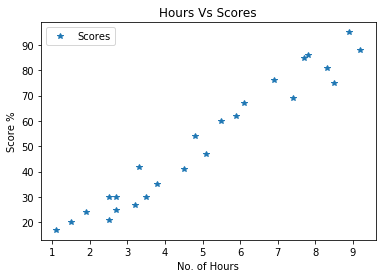

In [7]:
df.plot(x='Hours', y='Scores',style='*')
plt.title('Hours Vs Scores')
plt.xlabel('No. of Hours')
plt.ylabel('Score %')
plt.show()

Dividing the data into attributes and labels

In [8]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the data into training set and test set.

In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.3)

# Training the algorithm

In [12]:
reg = linear_model.LinearRegression()

In [13]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

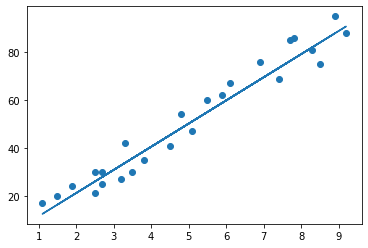

In [14]:
plt.scatter(x,y)
plt.plot(x, (reg.coef_*x)+(reg.intercept_))
plt.show()

# Comparing Actual Vs Predicted.

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': reg.predict(x_test)})
df

,Actual,Predicted
0,76,68.532118
1,30,35.660711
2,81,82.067404
3,95,87.868240
4,67,60.797670
5,30,25.992650
6,20,16.324589
7,42,33.727099


# Making predictions of a student who studies for 9.25 hours.

In [16]:
predicted_value = reg.predict([[9.25]])
print("No. of Hours = ", 9.25)
print("Score % = ", predicted_value[0])

No. of Hours =  9.25
Score % =  91.25206154765462


# Checking accuracy of the model.

In [17]:
print("Train : ",reg.score(x_train,y_train)*100)
print("Test : ",reg.score(x_test,y_test)*100)

Train :  95.00649401881425
Test :  94.98096599329133


In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, reg.predict(x_test)))
print('r^2 squared error:', r2_score(y_test, reg.predict(x_test)))
print('Mean squared error:', mean_squared_error(y_test, reg.predict(x_test)))

Mean absolute error: 5.435718553928897
r^2 squared error: 0.9498096599329132
Mean squared error: 34.536443534600515
